# <font color='brown'>Predicting whether a loan is Charged Off or not using Machine Learning</font>
### <center>(Group 8 )</center>

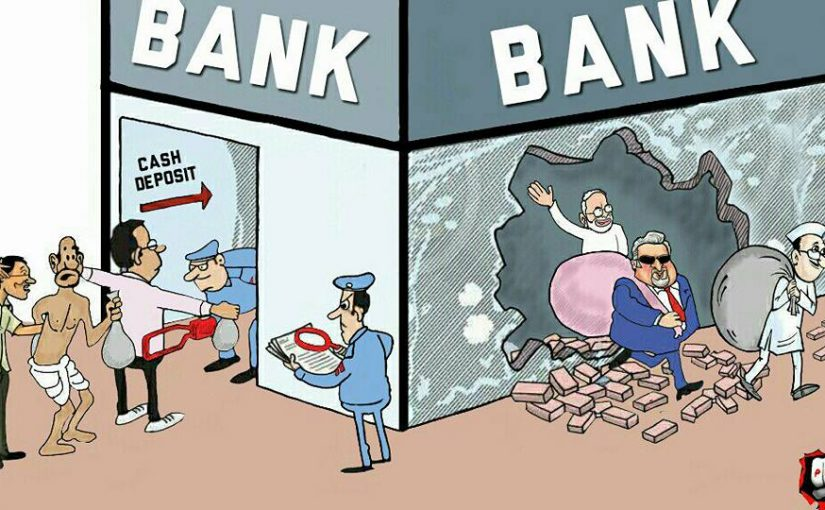

## Contents

* [1. Introduction](#1)
 * [1.1 References](#1.1)
* [2. Import the Data and Libraries](#2)
* [3. Response Variable](#3)
 * [3.1 Removing all the rows excluding Fully Paid and Charged-Off](#3.1)
* [4. Limit the Feature Space](#4)
 * [4.1 Drop features missing more than 50% data](#4.1)
 * [4.2 Finding Correlation Between Features](#4.2)
 * [4.3 Only keep loan features known to potential investors](#4.3)
* [5. Exploratory Data Analysis](#5)
 * [5.1 id](#5.1)
 * [5.2 Loan Amount](#5.2)
 * [5.3 Debt-to-Income(dti)](#5.3)
 * [5.4 Term](#5.4)
 * [5.5 int_rate](#5.5)
 * [5.6 Installment](#5.6)
 * [5.7 Grade, sub_grade](#5.7)
 * [5.8 Emp_title](#5.8)
 * [5.9 Emp_length](#5.9)
 * [5.10 Home _ownership](#5.10)
 * [5.11 Purpose](#5.11)
 * [5.12 zip_code,addr_state](#5.12)
 * [5.13 Fico_range_low, Fico_range_high](#5.13)
 * [5.14 pub_rec_bankrupties](#5.14)
 * [5.15 application_type](#5.15)
* [6. Create dummy variables](#6)
* [7. Convert loan status to 0/1 charge-off indicator](#7)
* [8. Model Training and Testing](#8)
* [9. Conclusion](#9)

## 1. Introduction
<a id="1"></a>

We’ll be working with some data from Lending Club, a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. Each borrower fills out a comprehensive application, providing (income, employment length, debt-to-income ratio, etc.) Lending Club evaluates each borrower’s FICO score(credit score) using past historical data (and their own data science process!) and assigns an interest rate to the borrower.

Approved loans are listed on the Lending Club website, where qualified investors can browse recently approved loans, the borrower’s credit score, the purpose for the loan, and other information from the application.

Once an investor decides to fund a loan, the borrower then makes monthly payments back to Lending Club. Lending Club redistributes these payments to investors. This means that investors don’t have to wait until the full amount is paid off to start to see returns. If a loan is fully paid off on time, the investors make a return which corresponds to the interest rate the borrower had to pay in addition to the requested amount.

Many loans aren’t completely paid off on time, however, and some borrowers default on the loan. That’s the problem we’ll be trying to address as we clean some data from Lending Club for machine learning. Let’s imagine we’ve been tasked with building a model to predict whether borrowers are likely to pay or default on their loans.

## 1.1 References 
<a id="1.1"></a>

* LendingClub information
 * [LendingClub website](https://www.lendingclub.com/)
 * [LendingClub Wikipedia page](https://en.wikipedia.org/wiki/Lending_Club)


## 2. Import the Data and Libraries
<a id="2"></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import random

In [2]:
data=pd.read_csv("D:\\Group8\Loan default.csv")

C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,18,48,58,117,128,129,130,133,134,135,138,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646801 entries, 0 to 1646800
Columns: 150 entries, id to settlement_term
dtypes: float64(113), object(37)
memory usage: 1.8+ GB


## 3. Response Variable
<a id="3"></a>

We'll be predicting the Loan_Status variable. So let's see the count of all different parameters we have in this Feature. 

In [5]:
print(data['loan_status'].value_counts(dropna=False))

Current                                                788950
Fully Paid                                             646902
Charged Off                                            168084
Late (31-120 days)                                      23763
In Grace Period                                         10474
Late (16-30 days)                                        5786
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    70
NaN                                                        23
Name: loan_status, dtype: int64


* **Current**  :- No of Loans that are Currently Running


* **Late**  :- Loan has not been current for 16 to 30 days or 31 to 120 days


* **In Grace Period**  :-  Loan is past due but within the 15-day grace period. 


* **Fully paid** :- Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.
 


* **Charged Off**  :-  Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached. Upon Charge Off, the remaining principal balance of the Note is deducted from the account balance. Charge Off typically occurs when a loan is 150 days or more past due and there is no reasonable expectation of sufficient payment.


* **Default**  :-  Loans that are in "Default" are loans for which borrowers have failed to make payments for an extended period of  time. 


* **Does not meet the credit policy (Fully Paid/Charged Off )** :-  It means something like the credit policy was updated after this loan was listed but before it issued. The credit policy changes all the time,so this is something we should ignore.

  
  

###  We're going to try to learn differences in the features between completed loans that have been fully paid or charged off. 
### We won't consider loans that are current, don't meet the credit policy, defaulted, or have a missing status. So we only keep the loans with status "Fully Paid" or "Charged Off."

In [6]:
label=list(data['loan_status'].value_counts(dropna=False).index)
value=list(data['loan_status'].value_counts(dropna=False))
value=[788950, 646902, 168084]
explode=(0.1,0,0)

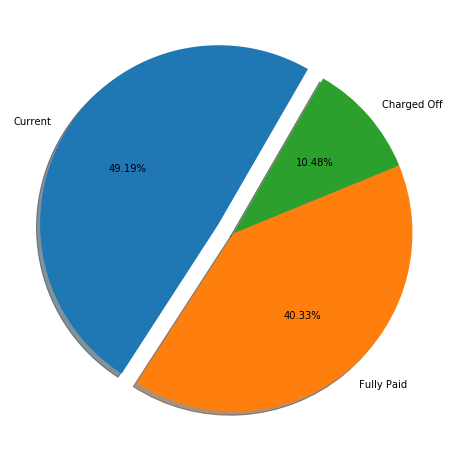

In [7]:
fig1, ax1 = plt.subplots(figsize=(8,10))

ax1.pie(value,explode=explode,labels=['Current','Fully Paid','Charged Off'],autopct='%1.2f%%',
        shadow=True, startangle=60)

plt.show()

In [8]:
data.shape

(1646801, 150)

### 3.1 Removing all the rows excluding Fully Paid and Charged-Off
<a id="3.1"></a>

In [9]:
data1 = data.loc[data['loan_status'].isin(['Fully Paid','Charged Off'])]

In [10]:
data1.shape

(814986, 150)

**There are 814,986 loans remaining. Check that the statuses are as expected:**

In [11]:
data1['loan_status'].value_counts(dropna=False)

Fully Paid     646902
Charged Off    168084
Name: loan_status, dtype: int64

**Status counts as percentages:**

In [12]:
data1['loan_status'].value_counts(dropna=True,normalize=True)

Fully Paid     0.793758
Charged Off    0.206242
Name: loan_status, dtype: float64

**About 79% of the remaining loans have been fully paid and 21% have charged off.**

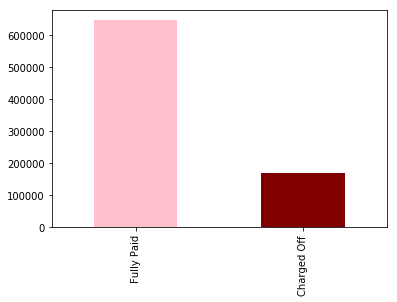

In [13]:
data1['loan_status'].value_counts().plot(kind='bar',color=['pink','maroon'])

## 4. Limit the Feature Space
<a id="4"></a>

The full dataset has 150 features for each loan. We'll select features in two steps:

1. Drop features with more than 50% of their data missing.
2. Of the remaining features, choose only those that would be available to an investor before deciding to fund the loan.

Definitions of the features are given in the LendingClub Data Dictionary [available here](https://www.lendingclub.com/info/download-data.action).

## 4.1 Drop features missing more than 50% data
<a id="4.1"></a>

First calculate the percentage of missing data for each feature:

In [14]:
missing_fractions = data1.isnull().mean().sort_values(ascending=False)

Top 10 features missing the most data:

In [15]:
missing_fractions.head(10)

member_id                                     1.000000
next_pymnt_d                                  1.000000
orig_projected_additional_accrued_interest    0.999876
sec_app_mths_since_last_major_derog           0.999628
hardship_length                               0.999275
hardship_type                                 0.999275
hardship_reason                               0.999275
hardship_status                               0.999275
deferral_term                                 0.999275
hardship_amount                               0.999275
dtype: float64

Let's visualize the distribution of missing data percentages:

Text(0, 0.5, 'feature count')

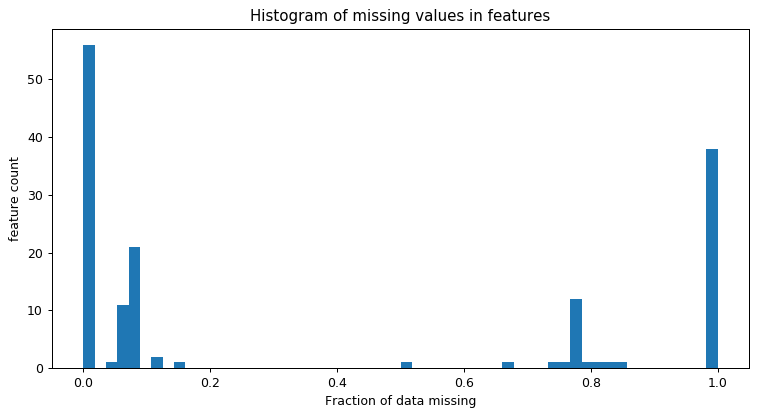

In [16]:
plt.figure(figsize=(10,5),dpi=90)
missing_fractions.plot.hist(bins=56)
plt.title('Histogram of missing values in features')
plt.xlabel('Fraction of data missing')
plt.ylabel('feature count')

**From the above histogram, we see there's a large gap between features missing "some" data (<20%) and those missing "lots" of data (>50%). Because it's generally very difficult to accurately replace data with more than 50% missing values, we drop such features. First store all variables missing more than 50% data in an alphabetical list:**

In [17]:
drop_list = list(missing_fractions[missing_fractions > 0.5].index)
print(drop_list)

['member_id', 'next_pymnt_d', 'orig_projected_additional_accrued_interest', 'sec_app_mths_since_last_major_derog', 'hardship_length', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_end_date', 'payment_plan_start_date', 'hardship_start_date', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'hardship_dpd', 'sec_app_revol_util', 'sec_app_chargeoff_within_12_mths', 'sec_app_open_act_il', 'sec_app_open_acc', 'sec_app_mort_acc', 'sec_app_inq_last_6mths', 'sec_app_fico_range_low', 'sec_app_num_rev_accts', 'sec_app_collections_12_mths_ex_med', 'revol_bal_joint', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'settlement_percentage', 'settlement_term', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'desc', 'mths_since_last_record', 'il_util', 'mths_since_rcnt_il', 'all_util', 'inq_last_12m

In [18]:
len(drop_list)

58

58 features will be dropped 

In [19]:

data1 = data1.drop(drop_list,axis=1)



In [20]:
data1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,38098114,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,...,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,N,Cash,N
1,36805548,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,...,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,N,Cash,N
2,37842129,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,Programming Analysis Supervisor,...,100.0,0.0,0.0,57073.0,42315.0,15000.0,35573.0,N,Cash,N
4,37662224,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,Technical Specialist,...,100.0,0.0,0.0,82331.0,64426.0,4900.0,64031.0,N,Cash,N
5,37822187,9600.0,9600.0,9600.0,36 months,13.66,326.53,C,C3,Admin Specialist,...,60.0,0.0,0.0,52490.0,38566.0,21100.0,24890.0,N,Cash,N


No of Remaining Features ?

In [21]:
data1.shape

(814986, 92)

Removing Features with only one value

In [22]:
print(data1['out_prncp_inv'].nunique())
print(data1['out_prncp'].nunique())
print(data1['policy_code'].nunique())

1
1
1


Above are the features that contain only one unique value.These feature won’t be useful for the model since they don’t add any information to each loan application
hence we do drop them

In [23]:
data1.drop(['out_prncp_inv','out_prncp','policy_code'],inplace=True,axis=1)

## 4.2 Finding Correlation Between Features
<a id="4.2"></a>


In [24]:
cor=data1.corr()

**Plotting Correlation Matrix**

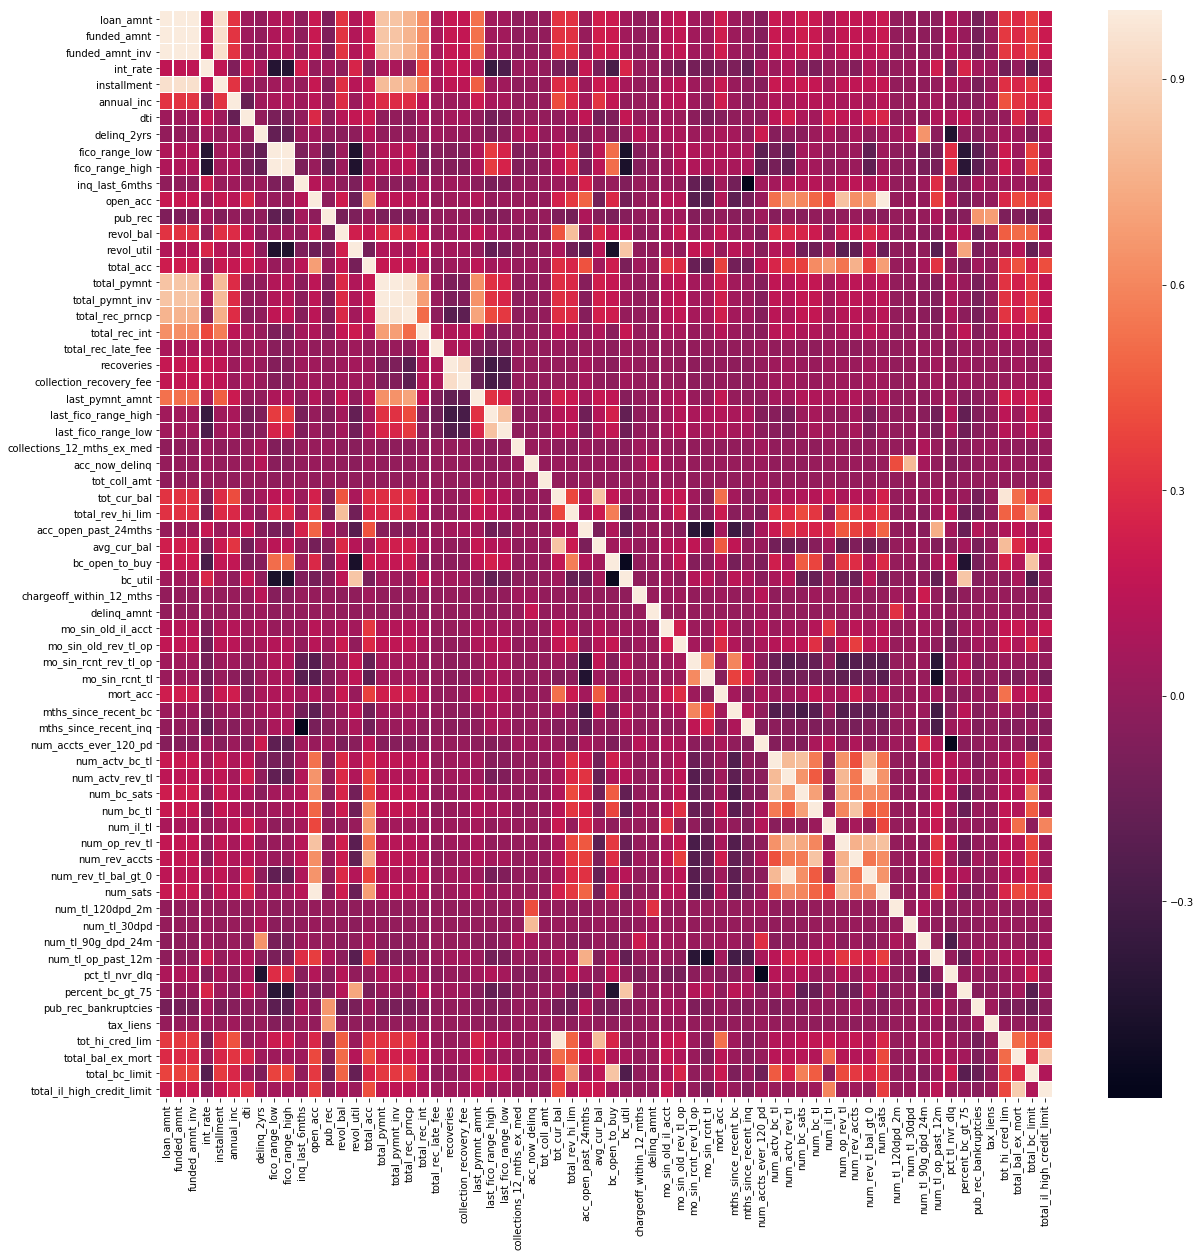

In [25]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(cor,ax=ax,linewidth=0.1)

**Here we can see that all Light blocks are Highly Correlated so we can keep any one feature between them to train our model** 

Comparing Correleation Between loan_amnt,funded_amnt,funded_amnt_inv

In [26]:
x=data1['id'].head(10)
y=data1['loan_amnt'].head(10)


In [27]:
y1=data1['funded_amnt'].head(10)
y2=data1['funded_amnt_inv'].head(10)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 

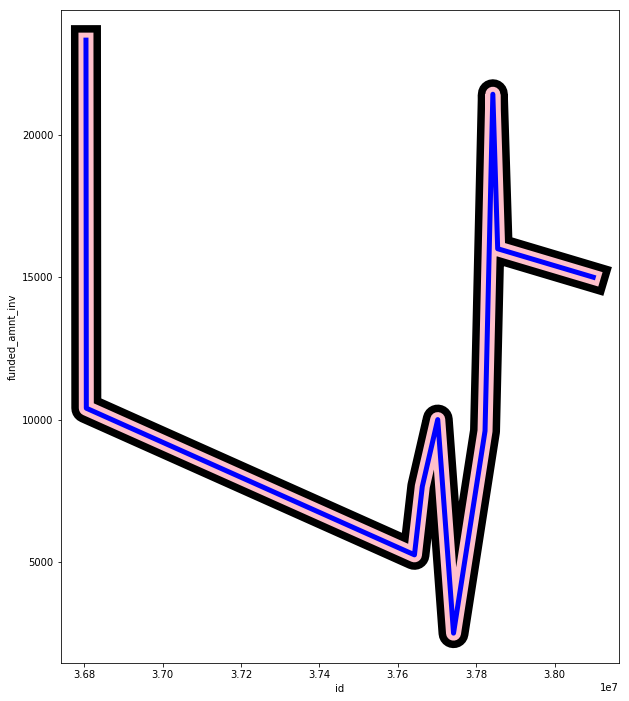

In [28]:
#plt.plot( data1['loan_amnt'].index, 'loan_amnt', data=data1, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
#plt.plot( data1['loan_amnt'], marker='o', color='olive', linewidth=0.5)
plt.figure(figsize=(10,12))
sns.lineplot(x, y, data=data1,c='black',linewidth=30)
sns.lineplot(x, y1, data=data1,c='pink',linewidth=15)
sns.lineplot(x, y2, data=data1,c='blue',linewidth=5)


**So from above plot we are getting that funded_amnt and funded_amnt_inv are highly correlated with loan_amnt. Hence we are droping the feature funded_amnt and funded_amnt_inv and keeping loan_amnt feature as it is important feature according to Lending Club.**

In [29]:
#data1_x1=data1

In [30]:
data1.drop(['funded_amnt','funded_amnt_inv'],axis=1,inplace=True)

Comparing Correleation Between open_acc and num_sats

In [31]:
#x3=data['id'].head(20)
y3=data1['open_acc'].head(10)
y3

0      6.0
1     17.0
2     10.0
4     11.0
5     12.0
6      9.0
7      7.0
8     14.0
9      8.0
10     5.0
Name: open_acc, dtype: float64

In [32]:
y4=data1['num_sats'].head(10)
print(y4)

0      6.0
1     17.0
2     10.0
4     11.0
5     12.0
6      9.0
7      7.0
8     14.0
9      8.0
10     5.0
Name: num_sats, dtype: float64


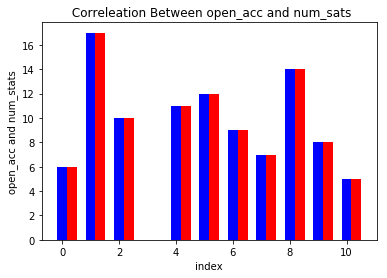

In [33]:
 #ax.bar(x, y3, data=data1)
 #ax.barplot(x, y4, data=data1)
fig, ax = plt.subplots()
bar_width = 0.35
ax.bar(y3.index,y3,bar_width,color='blue')
ax.bar(y4.index+bar_width,y4,bar_width,color='red')
plt.xlabel('index')
plt.ylabel('open_acc and num_stats')
plt.title(' Correleation Between open_acc and num_sats')
plt.show()

## 4.3 Only keep loan features known to potential investors
<a id="4.3"></a>

We examine the LendingClub website and Data Dictionary to determine which features would have been available to potential investors **link to be added** and all important Features related to loan.  

In [34]:
Feature_list = ['id','annual_inc','emp_title','emp_length','home_ownership','addr_state','zip_code','dti','fico_range_low','fico_range_high','earliest_cr_line',"open_acc",'total_acc','revol_bal','revol_util','inq_last_6mths','delinq_amnt','delinq_2yrs','mths_since_last_delinq','pub_rec','mths_since_last_record','mths_since_last_major_derog','application_type','loan_amnt','loan_status','int_rate','grade','sub_grade','installment','purpose','title','term','verification_status','issue_d','inital_list_status','mort_acc','pub_rec_bankruptcies']

Number of selected Features

In [35]:
len(Feature_list)

37

In [36]:
#data1_x=data1

In [37]:
full_list = list(data1.columns)
full_list

['id',
 'loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'm

In [38]:
for x in Feature_list:
    for y in full_list:
        if y == x:
            full_list.remove(y)

In [39]:
data1.drop(labels=full_list,axis=1,inplace=True)
print(data1.columns)


Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type',
       'delinq_amnt', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')


#### No of remaining colums

## 5. Exploratory Data Analysis
<a id="5"></a>

**We'll inspect each feature individually, and do the following:**

**1. Drop the feature if it is not useful for predicting the loan status.**

**2. View summary statistics and visualize the data, plotting against the loan status.**

**3. Modify the feature to make it useful for modeling, if necessary.**

## 5.1 id
<a id="5.1"></a>

A unique LendingClub assigned ID for the loan listing.

In [40]:
data1['id'].head(5)

0    38098114
1    36805548
2    37842129
4    37662224
5    37822187
Name: id, dtype: object

In [41]:
data1['id'].describe()

count       814986
unique      814986
top       14680062
freq             1
Name: id, dtype: int64

**Since all values are unique we drop the feature**

In [42]:
data1.drop(['id'],inplace=True,axis=1)

## 5.2 Loan Amount
<a id="5.2"></a>

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [43]:
data1['loan_amnt'].describe()

count    814986.000000
mean      14315.458210
std        8499.799241
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

500.0
40000.0
12000.0


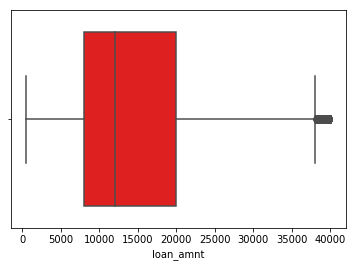

In [44]:
print(data1['loan_amnt'].min())
print(data1['loan_amnt'].max())
print(data1['loan_amnt'].median())
sns.boxplot(x=data1['loan_amnt'],color='red')



## 5.3 Debt-to-Income(dti)
<a id="5.3"></a>

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

**In General, the lower the percentage of DTI ratio, the better the chance of borrower will be able to get a loan.**

Text(0.5, 1.0, 'Debt-to-income Ratio')

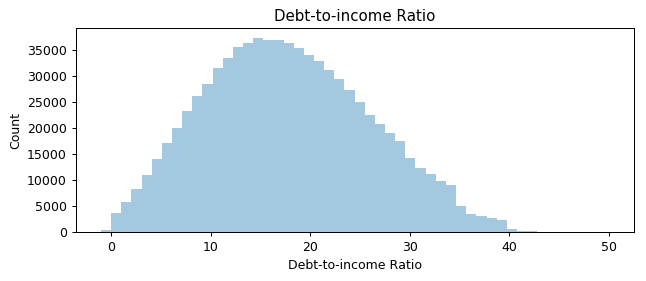

In [45]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(data1.loc[data1['dti'].notnull() & (data1['dti']<50), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

Very few. Compare the summary statistics by loan status:

In [46]:
data1.groupby('loan_status')['dti'].median()

loan_status
Charged Off    19.77
Fully Paid     16.77
Name: dti, dtype: float64

Completed loans that are charged off tend to have higher debt-to-income ratios.

## 5.4 Term
<a id="5.4"></a>

The number of payments on the loan. Values are in months and can be either 36 or 60.

In [47]:
data1['term'].value_counts(dropna=True,normalize=True)

 36 months    0.75886
 60 months    0.24114
Name: term, dtype: float64

We can see that about 76% of the loans have three-year periods, and the rest have five-year periods

In [48]:
data1.groupby('term')['loan_status'].value_counts(dropna=True,normalize=True).loc[:,'Charged Off']

term
 36 months    0.165710
 60 months    0.333793
Name: loan_status, dtype: float64

**Here we can see that borrowers who have loan for 5-years period tend to Charge-off twice as compared to 3-years**

In [49]:
data1['term'].astype(str)
data1['term'].dtype

dtype('O')

In [50]:
data1['term']=data1.term.str.split(" ").str[1]


In [51]:
data1['term'].head()

0    60
1    36
2    60
4    36
5    36
Name: term, dtype: object

Total no of Loans group with respect to Terms

In [52]:
data2=data1.groupby('term')
term_x=data1['term'].value_counts()
print(term_x)
term_x.index

36    618460
60    196526
Name: term, dtype: int64


Index(['36', '60'], dtype='object')

Count of Charged-off loans with respect to Terms

In [53]:
term_y1=(data2['loan_status'].value_counts().loc[:,'Charged Off'])
print(term_y1)
print(term_y1.index)

term
36    102485
60     65599
Name: loan_status, dtype: int64
Index(['36', '60'], dtype='object', name='term')


Count of Fully_paid loans with respect to Terms

In [54]:
term_y2=(data2['loan_status'].value_counts().loc[:,'Fully Paid'])
print(term_y2)

term
36    515975
60    130927
Name: loan_status, dtype: int64


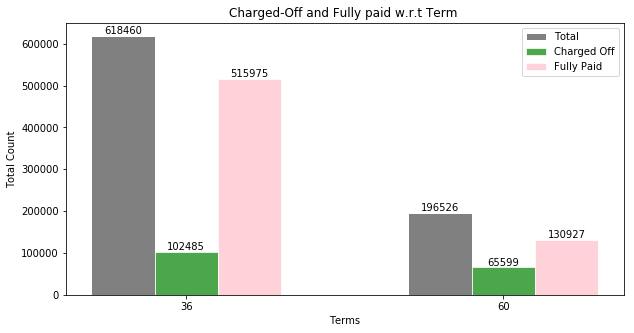

In [55]:
from pylab import rcParams
rcParams['figure.figsize']=10,5
term_x_list=list(term_x)
term_y1_list=list(term_y1)
term_y2_list=list(term_y2)
opacity=0.7
bar_width = 0.2
fig, ax = plt.subplots()
r1 = np.arange(len(term_x_list))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
#plt.figure(figsize=(20,15))
a=ax.bar(r1,term_x_list, color='grey', width=bar_width, edgecolor='white', label='Total')
b=ax.bar(r2, term_y1_list, color='green', width=bar_width, edgecolor='white', label='Charged Off',alpha=opacity)
c=ax.bar(r3, term_y2_list, color='pink', width=bar_width, edgecolor='white', label='Fully Paid',alpha=opacity)

plt.xticks([r + bar_width for r in range(len(term_x_list))], ['36','60'])
 




def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.00*height,
                '%d' % int(height),
                ha='center', va='bottom')


autolabel(a)
autolabel(b)
autolabel(c)
plt.legend()
plt.xlabel("Terms")
plt.ylabel("Total Count")
plt.title("Charged-Off and Fully paid w.r.t Term ")
plt.show()


**As we can see from above plot that loans with 3-years tend to Charge-Off more**

## 5.5 int_rate
<a id="5.5"></a>

Interest Rate on the loan

count    814986.000000
mean         13.490993
std           4.618486
min           5.320000
25%           9.990000
50%          13.110000
75%          16.290000
max          30.990000
Name: int_rate, dtype: float64


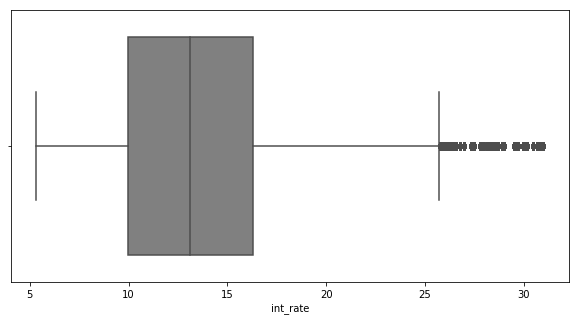

In [56]:
print(data1['int_rate'].describe())
sns.boxplot(x=data1['int_rate'],color="grey")

                count       mean       std   min    25%    50%    75%    max
loan_status                                                                 
Charged Off  168084.0  15.736335  4.625755  5.32  12.59  15.31  18.55  30.99
Fully Paid   646902.0  12.907587  4.434262  5.32   9.49  12.68  15.61  30.99


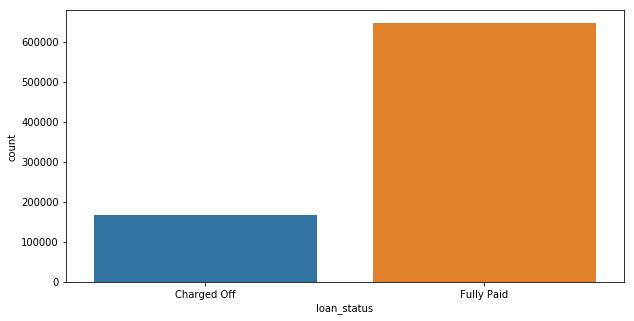

In [57]:
data3 = data1.groupby('loan_status')
intrate=data3['int_rate'].describe()
print(intrate)
sns.barplot(x=intrate.index,y=intrate['count'])

**Charged-off loans tend to have much higher interest rates.**

## 5.6 Installment
<a id="5.6"></a>

The monthly payment owed by the borrower if the loan originates

count    814986.000000
mean        436.749624
std         255.732093
min           4.930000
25%         251.400000
50%         377.040000
75%         576.290000
max        1714.540000
Name: installment, dtype: float64


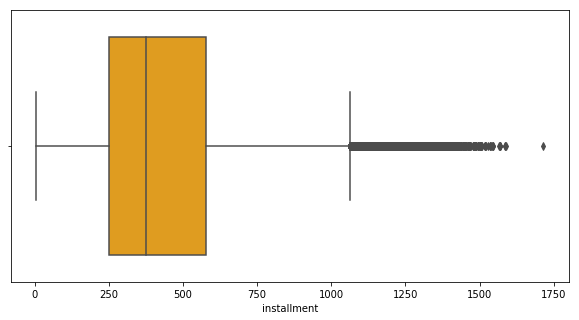

In [58]:
print(data1['installment'].describe())
sns.boxplot(x=data1['installment'],color='orange')

**Installments range from \\$4.93  to   \\$1,714 , with a median of $377**.

In [59]:
install_data=data1.groupby('loan_status')
install=install_data['installment'].mean()
print(install)
#sns.barplot(x=install.index,y=install['mean'])

loan_status
Charged Off    459.973673
Fully Paid     430.715339
Name: installment, dtype: float64


**Loans that charge off have approximate \\$30 higher installments on average**

## 5.7 Grade, sub_grade
<a id="5.7"></a>

**Grade** :- LendingClub assigned loan grade
    
**Sub-Grade**  :- LendingClub assigned loan subgrade
    
What are the possible values of `grade` and `sub_grade`?

In [60]:
print(sorted(data1['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


The grade is implied by the subgrade, so let's drop the grade column.

In [61]:
data1.drop('grade', axis=1, inplace=True)

In [62]:
print(sorted(data1['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


Text(0.5, 0, 'Sub_grade')

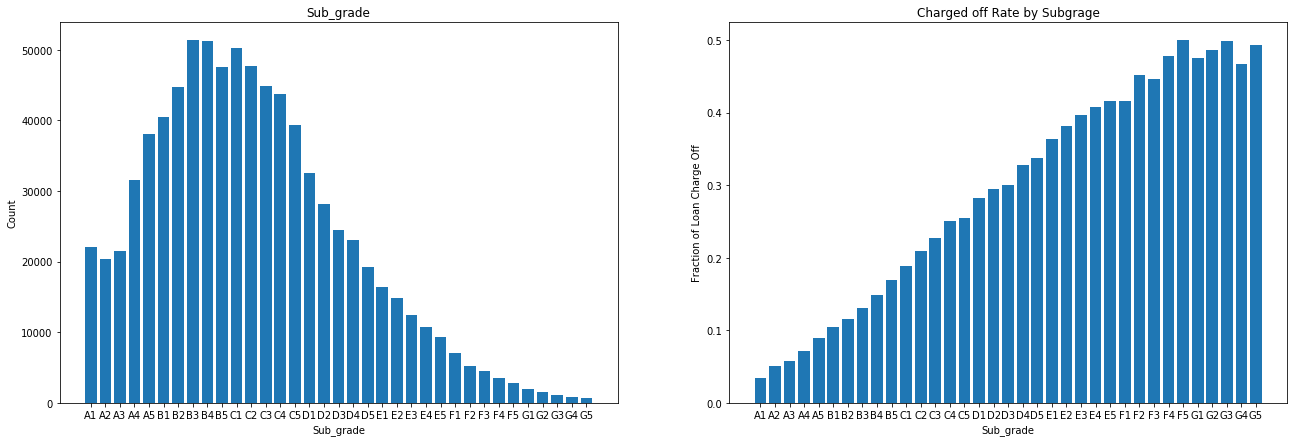

In [63]:
sub_grade_data=data1.groupby('sub_grade')
plt.figure(figsize=(22,7))
sub_plot1=sub_grade_data['loan_status'].count()
sub_plot_C=sub_grade_data['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
#print(sub_plot1)
plt.subplot(1,2,1)
plt.bar(sub_plot1.index,sub_plot1)
plt.title("Sub_grade")
plt.ylabel('Count')
plt.xlabel('Sub_grade')
plt.subplot(1,2,2)
plt.bar(sub_plot_C.index,sub_plot_C)
plt.title("Charged off Rate by Subgrage")
plt.ylabel('Fraction of Loan Charge Off')
plt.xlabel('Sub_grade')

**There's a clear trend of higher probability of charge-off as the subgrade worsens.**

## 5.8 Emp_title
<a id="5.8"></a>

The job title supplied by the Borrower when applying for the loan

In [64]:
data1['emp_title'].describe()

count      766415
unique     280473
top       Teacher
freq        11351
Name: emp_title, dtype: object

**There are too many different job titles for the emp_title feature so we drop this feature.**

In [65]:
data1.drop('emp_title',axis=1,inplace=True)

## 5.9 Emp_length
<a id="5.9"></a>

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

The actual data does not match this description

In [66]:
data1['emp_length'].value_counts(dropna=False)

10+ years    264873
2 years       73493
3 years       64999
< 1 year      64572
1 year        53411
5 years       52149
4 years       48752
NaN           42253
6 years       40290
7 years       39407
8 years       38887
9 years       31900
Name: emp_length, dtype: int64

Note there are 42,253 loans without data on the length of employment.

Convert `emp_length` to integers:

In [67]:
data1['emp_length'].replace(to_replace='10+ years',value='10 years',inplace=True)
data1['emp_length'].replace(to_replace='< 1 year',value='0 years',inplace=True)


In [68]:
data1['emp_length'].head(10)

0     10 years
1      8 years
2      6 years
4      0 years
5     10 years
6      0 years
7      6 years
8     10 years
9      2 years
10     8 years
Name: emp_length, dtype: object

In [69]:
data1['emp_length']=data1.emp_length.str.split(" ").str[0]
data1['emp_length'].head(10)

0     10
1      8
2      6
4      0
5     10
6      0
7      6
8     10
9      2
10     8
Name: emp_length, dtype: object

In [70]:
def emp_length(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [71]:
data1['emp_length']=data1['emp_length'].apply(emp_length)

In [72]:
emp_length_data=data1.groupby('emp_length')
emp_length_data_x=emp_length_data 

Text(0, 0.5, 'Percentage of Loan Default')

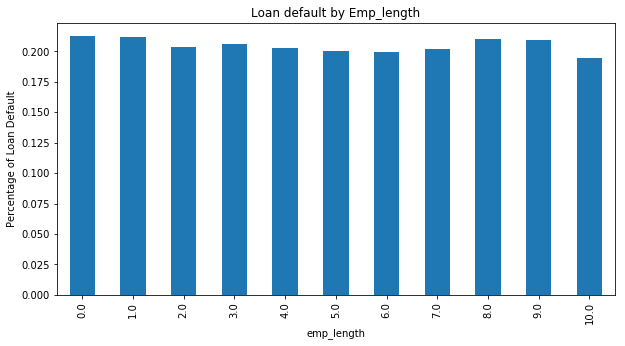

In [73]:
(emp_length_data['loan_status'].value_counts(normalize=True,dropna=True).loc[:,'Charged Off']).plot(kind='bar')
plt.title('Loan default by Emp_length')
plt.ylabel('Percentage of Loan charged off')

Loan status does not appear to vary much with employment length on average, except for a small drop in charge-offs for borrowers with over 10 years of employment.

## 5.10 Home _ownership
<a id="5.10"></a>

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [74]:
data1['home_ownership'].value_counts(dropna=False)

MORTGAGE    406866
RENT        325071
OWN          82765
OTHER          144
ANY             94
NONE            46
Name: home_ownership, dtype: int64

Replace Any and None with Others

In [75]:
data1['home_ownership'].replace(['NONE','ANY'],'OTHER',inplace=True)

In [76]:
home_owner_T=data1['home_ownership'].value_counts(dropna=False).sort_index()
print(home_owner_T)
print(home_owner_T.index)

MORTGAGE    406866
OTHER          284
OWN          82765
RENT        325071
Name: home_ownership, dtype: int64
Index(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype='object')


In [77]:
home_ownership_data=data1.groupby('home_ownership')
home_ownership_data_x = home_ownership_data

In [78]:
home_owner_C=(home_ownership_data['loan_status'].value_counts().loc[:,'Charged Off']).sort_index()
home_owner_C

home_ownership
MORTGAGE    72344
OTHER          50
OWN         17861
RENT        77829
Name: loan_status, dtype: int64

In [79]:
home_owner_F=(home_ownership_data['loan_status'].value_counts().loc[:,'Fully Paid']).sort_index()
home_owner_F

home_ownership
MORTGAGE    334522
OTHER          234
OWN          64904
RENT        247242
Name: loan_status, dtype: int64

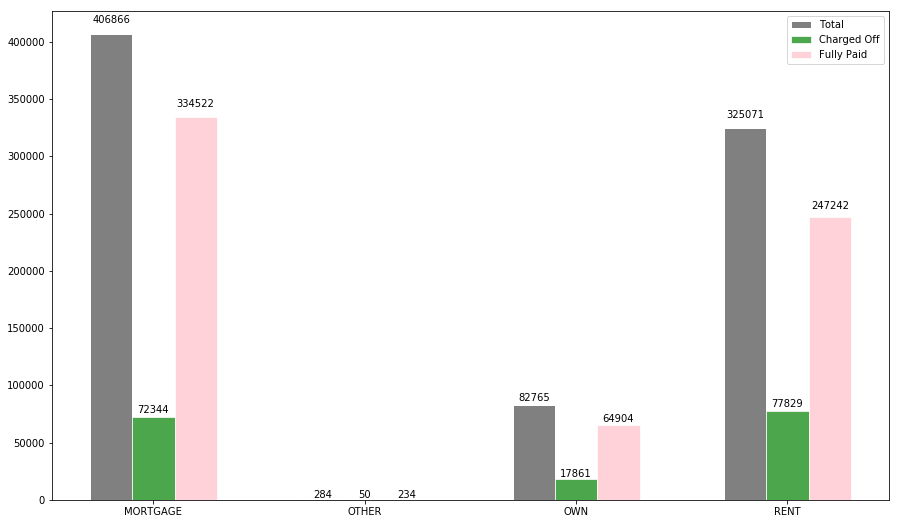

In [80]:
from pylab import rcParams
rcParams['figure.figsize']=15,9
home_owner_T=list(home_owner_T)
home_owner_C=list(home_owner_C)
home_owner_F=list(home_owner_F)
opacity=0.7
bar_width = 0.2
fig, ax = plt.subplots()
r11 = np.arange(len(home_owner_T))
r22 = [x + bar_width for x in r11]
r33 = [x + bar_width for x in r22]
#plt.figure(figsize=(20,15))
a1=ax.bar(r11,home_owner_T, color='grey', width=bar_width, edgecolor='white', label='Total')
b1=ax.bar(r22, home_owner_C, color='green', width=bar_width, edgecolor='white', label='Charged Off',alpha=opacity)
c1=ax.bar(r33, home_owner_F, color='pink', width=bar_width, edgecolor='white', label='Fully Paid',alpha=opacity)

plt.xticks([r + bar_width for r in range(len(home_owner_T))], ['MORTGAGE', 'OTHER', 'OWN', 'RENT'])
 




def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')


autolabel(a1)
autolabel(b1)
autolabel(c1)
plt.legend()
plt.show()


In [81]:
home_owner_PER=(home_ownership_data['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']).sort_index()
home_owner_PER

home_ownership
MORTGAGE    0.177808
OTHER       0.176056
OWN         0.215804
RENT        0.239422
Name: loan_status, dtype: float64

From above values it is quite clear that **Home owners (21%)** and **Renters (23%)** have a high probability of defaulting on loan.

## 5.11 Purpose
<a id="5.11"></a>

A category provided by the borrower for the loan request

In [82]:
data1['purpose'].value_counts(dropna=False).sort_index()
purpose_data=data1.groupby('purpose')
purpose_x=purpose_data['purpose'].count()
print(purpose_x)

purpose
car                     8936
credit_card           175123
debt_consolidation    481652
educational              326
home_improvement       50793
house                   4095
major_purchase         17463
medical                 8772
moving                  5725
other                  43900
renewable_energy         599
small_business         10214
vacation                5116
wedding                 2272
Name: purpose, dtype: int64


Calculate the charge-off count by purpose

In [83]:
purpose_y1=purpose_data['loan_status'].value_counts().loc[:,'Charged Off'].sort_index()
purpose_y1

purpose
car                     1323
credit_card            31244
debt_consolidation    104710
educational               56
home_improvement        9213
house                    879
major_purchase          3200
medical                 2012
moving                  1391
other                   9525
renewable_energy         148
small_business          3089
vacation                1017
wedding                  277
Name: loan_status, dtype: int64

Calculate the Fully-Paid count by purpose

In [84]:
purpose_y2=purpose_data['loan_status'].value_counts().loc[:,'Fully Paid'].sort_index()
purpose_y2

purpose
car                     7613
credit_card           143879
debt_consolidation    376942
educational              270
home_improvement       41580
house                   3216
major_purchase         14263
medical                 6760
moving                  4334
other                  34375
renewable_energy         451
small_business          7125
vacation                4099
wedding                 1995
Name: loan_status, dtype: int64

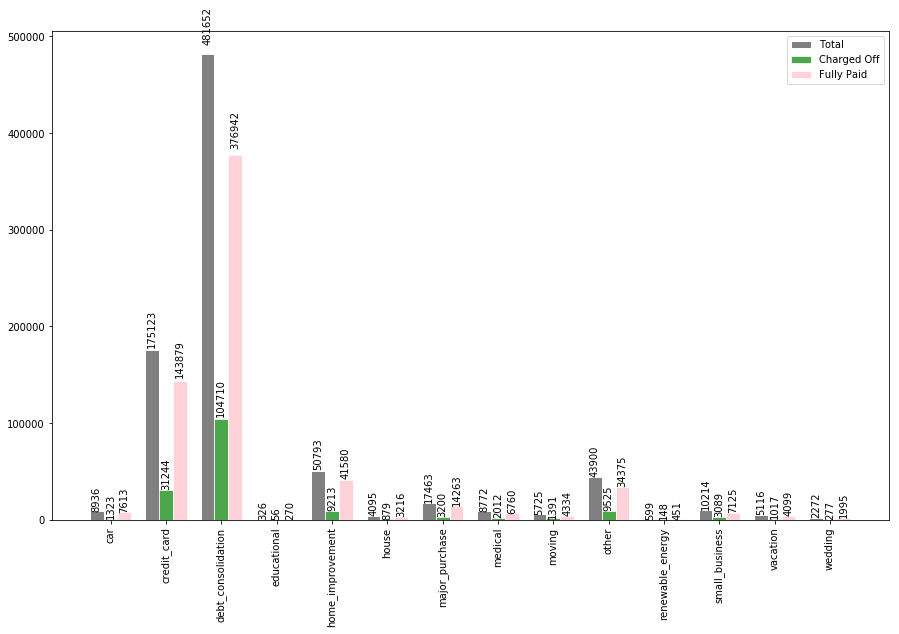

In [85]:
from pylab import rcParams
rcParams['figure.figsize']=15,9
purpose_x_T=list(purpose_x)
purpose_y1_C=list(purpose_y1)
purpose_y2_F=list(purpose_y2)
opacity=0.7
bar_width = 0.25
fig, ax = plt.subplots()
r111 = np.arange(len(purpose_x_T))
r222 = [x + bar_width for x in r111]
r333 = [x + bar_width for x in r222]
#plt.figure(figsize=(20,15))
a11=ax.bar(r111,purpose_x_T, color='grey', width=bar_width, edgecolor='white', label='Total')
b11=ax.bar(r222, purpose_y1_C, color='green', width=bar_width, edgecolor='white', label='Charged Off',alpha=opacity)
c11=ax.bar(r333, purpose_y2_F, color='pink', width=bar_width, edgecolor='white', label='Fully Paid',alpha=opacity)

plt.xticks([r + bar_width for r in range(len(purpose_x_T))],['car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding'],rotation=90)
 




def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom',rotation=90)


autolabel(a11)
autolabel(b11)
autolabel(c11)
plt.legend()
plt.show()


Calculate the Charge-off rates by purpose

In [86]:
purpose_C=purpose_data['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()
purpose_C

purpose
wedding               0.121919
car                   0.148053
educational           0.171779
credit_card           0.178412
home_improvement      0.181383
major_purchase        0.183245
vacation              0.198788
house                 0.214652
other                 0.216970
debt_consolidation    0.217398
medical               0.229366
moving                0.242969
renewable_energy      0.247078
small_business        0.302428
Name: loan_status, dtype: float64

**Here we noticce that only 12% of completed loans for weddings have charged-off, but 30% of completed small business loans have charged-off.**

## 5.12  zip_code,addr_state
<a id="5.12"></a>

**zip_code** :- The first 3 numbers of the zip code provided by the borrower in the loan application.

**addr_state** :- The state provided by the borrower in the loan application.

In [87]:
data1['addr_state'].head()


0    VA
1    CA
2    MO
4    AZ
5    NJ
Name: addr_state, dtype: object

In [88]:
data1['addr_state'].nunique()

51

In [89]:
data1['zip_code'].head()

0    235xx
1    937xx
2    658xx
4    850xx
5    077xx
Name: zip_code, dtype: object

In [90]:
data1['zip_code'].nunique()

925

**There are a lot of different zip codes, so let's just keep the state column.**

In [91]:
data1.drop(labels='zip_code', axis=1, inplace=True)

Calculate the charge-off rates by address state:

In [92]:
addr_data = data1.groupby('addr_state')
addr_state_T=data1['addr_state'].value_counts(dropna=False).sort_index(ascending=False)
addr_state_C=addr_data['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_index(ascending=False)

Text(0.5, 0, 'Sub_grade')

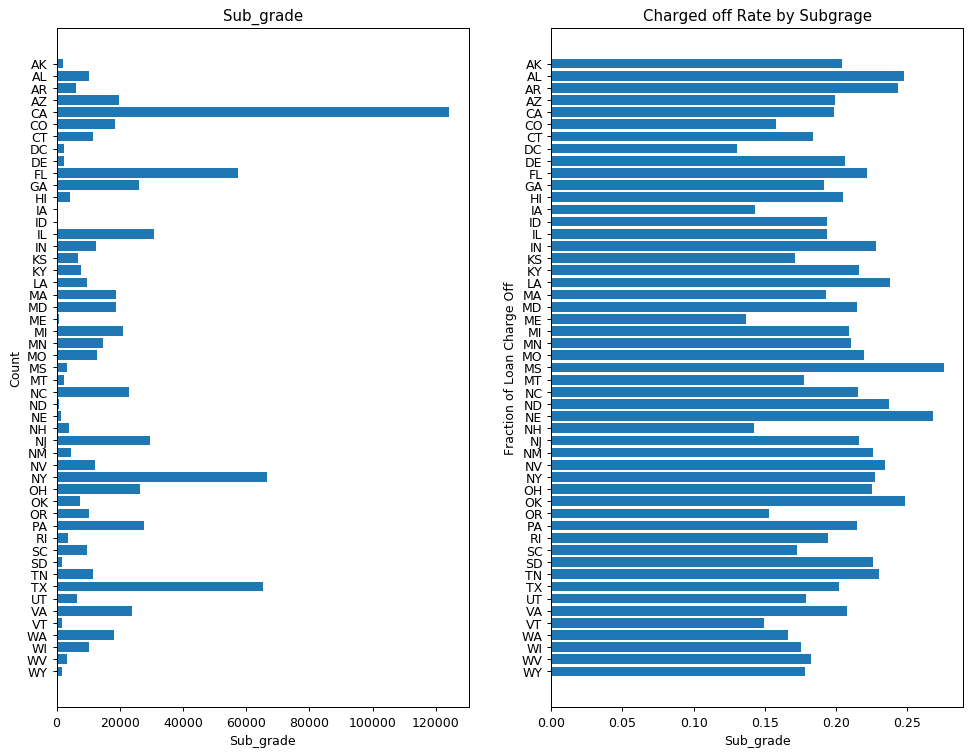

In [93]:
plt.figure(figsize=(13,10),dpi=90)
plt.subplot(1,2,1)
plt.barh(addr_state_T.index,addr_state_T)
plt.title("Sub_grade")
plt.ylabel('Count')
plt.xlabel('Sub_grade')
plt.subplot(1,2,2)
plt.barh(addr_state_C.index,addr_state_C)
plt.title("Charged off Rate by Subgrage")
plt.ylabel('Fraction of Loan Charge Off')
plt.xlabel('Sub_grade')

In [94]:
addr_state_C.tail(1)

addr_state
AK    0.204141
Name: loan_status, dtype: float64

In [95]:
addr_state_C.head(1)

addr_state
WY    0.178142
Name: loan_status, dtype: float64

**The charge-off rate ranges from 13.0% in Washington, DC to 27.6% in Mississippi.**

## 5.13 Fico_range_low, Fico_range_high
<a id="5.13"></a>

**fico_range_low**  :-   "The lower boundary range the borrower’s FICO at loan origination belongs to."

**fico_range_high**  :-   "The upper boundary range the borrower’s FICO at loan origination belongs to."

In [96]:
data1[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


We will keep only one fico score which is the average of the fico_range as both the features are highly correlated

In [97]:
data1['fico_score'] = 0.5*data1['fico_range_high'] + 0.5 * data1['fico_range_low']

In [98]:
data1.drop(['fico_range_low','fico_range_high'],axis=1,inplace=True)

In [99]:
print(data1['fico_score'].describe())


count    814986.000000
mean        697.603208
std          31.352520
min         627.000000
25%         672.000000
50%         692.000000
75%         712.000000
max         847.500000
Name: fico_score, dtype: float64


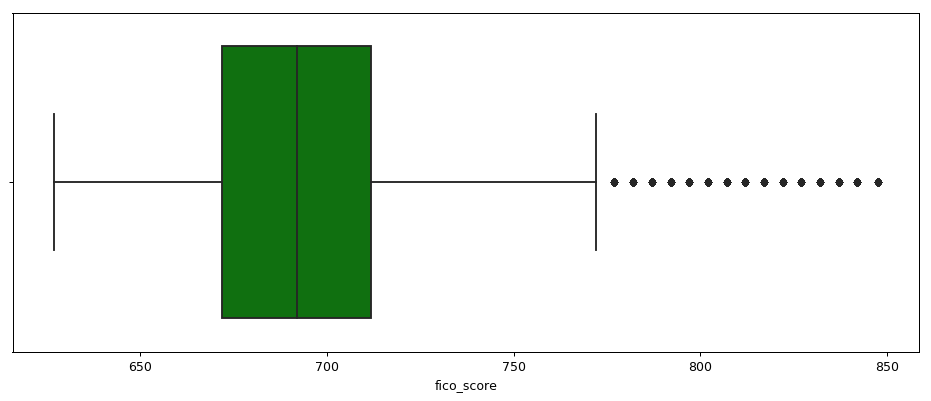

In [100]:
plt.figure(figsize=(13,5),dpi=90)
sns.boxplot(x=data1['fico_score'],color='green')

In [101]:
data1.groupby('loan_status')['fico_score'].mean()

loan_status
Charged Off    689.027278
Fully Paid     699.831485
Name: fico_score, dtype: float64

Loans that charge off have a FICO score 10 points lower on average.

## 5.14 pub_rec_bankrupties
<a id="5.14"></a>

Number of public record bankruptcies

In [102]:
data1['pub_rec_bankruptcies'].value_counts(dropna=False).sort_index()

0.0     714642
1.0      93680
2.0       4673
3.0        926
4.0        234
5.0         85
6.0         28
7.0         14
8.0          5
9.0          1
12.0         1
NaN        697
Name: pub_rec_bankruptcies, dtype: int64

pub_rec_bankruptcies
0.0    0.203782
1.0    0.222588
2.0    0.248449
3.0    0.230022
4.0    0.299145
5.0    0.270588
6.0    0.357143
7.0    0.214286
8.0    0.600000
Name: loan_status, dtype: float64


Text(0, 0.5, 'Fraction of loan default')

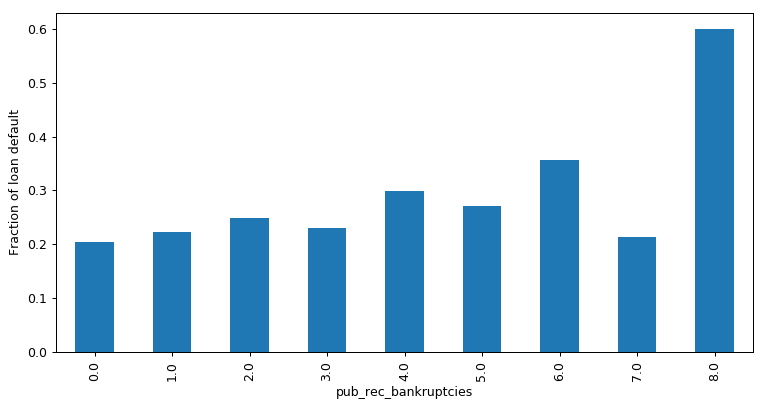

In [103]:
pub_record=data1.groupby('pub_rec_bankruptcies')
pubic_record_x = pub_record
plt.figure(figsize=(10,5),dpi=90)
print(pub_record['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'])
(pub_record['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']).plot(kind='bar')
plt.ylabel('Fraction of loan default')

**From the graph it is can be concluded that the people with 8 public bankruptcy record have a high probability of dafaulting**

## 5.15 application_type
<a id="5.15"></a>

In [104]:
app_data = data1['application_type'].value_counts()
app_data

Individual    811207
Joint App       3779
Name: application_type, dtype: int64

In [105]:
app_data_grp= data1.groupby('application_type')
app_data_T=app_data_grp['loan_status'].count()
print(app_data_T)
app_data_C=app_data_grp['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
app_data_C


application_type
Individual    811207
Joint App       3779
Name: loan_status, dtype: int64


application_type
Individual    0.206316
Joint App     0.190262
Name: loan_status, dtype: float64

Text(0.5, 0, 'Sub_grade')

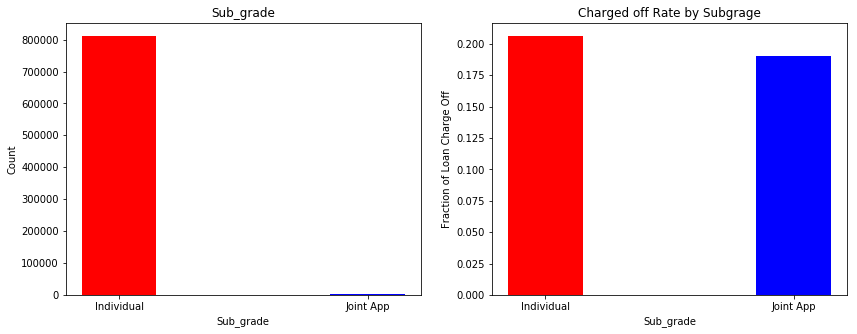

In [106]:

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.bar(app_data.index,app_data,color=['red','blue'],width=0.3)
plt.title("Sub_grade")
plt.ylabel('Count')
plt.xlabel('Sub_grade')
plt.subplot(1,2,2)
plt.bar(app_data_C.index,app_data_C,color=['red','blue'],width=0.3)
plt.title("Charged off Rate by Subgrage")
plt.ylabel('Fraction of Loan Charge Off')
plt.xlabel('Sub_grade')

In [107]:
app_data_C

application_type
Individual    0.206316
Joint App     0.190262
Name: loan_status, dtype: float64

**Here we can see that People with Indivisual account have approximate 21% chances of being charged-off where as Joint Application have 19% so there isn't more difference**

In [108]:
data1.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type',
       'delinq_amnt', 'mort_acc', 'pub_rec_bankruptcies', 'fico_score'],
      dtype='object')

In [109]:
analyse_data=data1

**In reference to LendingClub the following features have less significant value in analysis of loan Charged Off, hence we drop these features from our analysis.** 

In [110]:
analyse_data.drop([ 'verification_status','issue_d', 'title',
                   'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'revol_bal',
       'revol_util','delinq_amnt'],axis=1,inplace=True)

In [111]:
print(analyse_data.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose',
       'addr_state', 'dti', 'open_acc', 'pub_rec', 'total_acc',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'fico_score'],
      dtype='object')


In [112]:
sample_analysis=analyse_data

print(sample_analysis.isna().nunique())

#sample_analysis['mort_acc'].value_counts(dropna=False)


loan_amnt               1
term                    1
int_rate                1
installment             1
sub_grade               1
emp_length              2
home_ownership          1
annual_inc              1
loan_status             1
purpose                 1
addr_state              1
dti                     2
open_acc                1
pub_rec                 1
total_acc               1
application_type        1
mort_acc                2
pub_rec_bankruptcies    2
fico_score              1
dtype: int64


In [113]:
sample_analysis.fillna(0,inplace=True,axis=1)

In [114]:
sample_analysis.to_csv("D:\project.csv")

In [115]:
loan_status=sample_analysis['loan_status']
sample_analysis.drop('loan_status',axis=1,inplace=True)


## 6. Create dummy variables
<a id="6"></a>

In [116]:
x = pd.get_dummies(sample_analysis, columns=['sub_grade', 'home_ownership', 'purpose', 'addr_state', 'application_type'],drop_first=True)

In [117]:
x.head()


,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,total_acc,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Joint App
0,15000.0,60,12.39,336.64,10.0,78000.0,12.03,6.0,0.0,17.0,...,0,0,0,1,0,0,0,0,0,0
1,10400.0,36,6.99,321.08,8.0,58000.0,14.92,17.0,0.0,36.0,...,0,0,0,0,0,0,0,0,0,0
2,21425.0,60,15.59,516.36,6.0,63800.0,18.49,10.0,0.0,35.0,...,0,0,0,0,0,0,0,0,0,0
4,7650.0,36,13.66,260.20,0.0,50000.0,34.81,11.0,0.0,20.0,...,0,0,0,0,0,0,0,0,0,0
5,9600.0,36,13.66,326.53,10.0,69000.0,25.81,12.0,0.0,44.0,...,0,0,0,0,0,0,0,0,0,0


# 7. Convert loan status to 0/1 charge-off indicator
<a id="7"></a>

Changing the response variable loan_status to a 0/1 variable, where 1 indicates fully paid and 0 indicates charge-off.

In [118]:
y1=pd.get_dummies(loan_status, columns=['loan_status'],drop_first=True)

In [119]:
y1.head(10)

,Fully Paid
0,1
1,0
2,1
4,0
5,1
6,1
7,1
8,0
9,1
10,0


# 8. Model Training and Testing
<a id="8"></a>

Importing Inbuild libraries related to our model

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,fbeta_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV

Now we'll split the data in to Traning(80%) and Testing(20%) to verify our model later

In [125]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y1,test_size=0.2,random_state=42)

In [249]:
grid={"criterion":['gini'],
     "min_samples_split":[8,10,12],
      "max_depth":[6,8,10],
      "min_samples_leaf":[10,20,30],
      "max_leaf_nodes":[10,20,30]
     }

In [250]:
dtc=DecisionTreeClassifier()

In [251]:
grid_T=GridSearchCV(dtc,grid,cv=5)

In [ ]:
grid_T.fit(xtrain,ytrain)

In [198]:
print("Best_score:",(grid_T.best_score_))
print("Best_param:",(grid_T.best_params_))

R-squared: 0.7955345803910502
R-squared: {'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 30, 'min_samples_leaf': 10, 'min_samples_split': 8}


In [253]:
#dtc=DecisionTreeClassifier(max_depth=8, max_leaf_nodes= 30, min_samples_leaf=10, min_samples_split= 8)
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [254]:
y_pred = dtc.predict(xtest)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [255]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(ytest,y_pred)
print(con)

[[ 10090  23694]
 [ 25306 103908]]


In [256]:
accuracy = accuracy_score(ytest,y_pred)
prec = precision_score(ytest,y_pred)
rec = recall_score(ytest,y_pred)
f1 = f1_score(ytest,y_pred)
fb = fbeta_score(ytest,y_pred,beta=0.5)
print(" accuracy_score:", accuracy)
print(" precision_score:", prec)
print("recall_score",rec)
print("f1_score",f1)
print("fbeta_score",fb)

 accuracy_score: 0.6993828145130615
 precision_score: 0.8143132552781305
recall_score 0.8041543485999969
f1_score 0.8092019188835586
fbeta_score 0.8122609916481923


In [257]:
current_data = data.loc[data['loan_status'].isin(['Current'])]

In [258]:
current_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
13,37712169,NaN,21075.0,21075.0,21075.0,60 months,21.99,581.95,E,E5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
19,37752109,NaN,13550.0,13550.0,13550.0,60 months,19.99,358.92,E,E3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
20,36441833,NaN,7200.0,7200.0,7200.0,36 months,12.39,240.49,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
21,37611006,NaN,14000.0,14000.0,14000.0,36 months,10.49,454.97,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
current_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=150)

In [260]:
current_data['fico_score'] = 0.5*current_data['fico_range_high'] + 0.5 * current_data['fico_range_low']

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [261]:
current_data1 = current_data.loc[:,['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose',
       'addr_state', 'dti', 'open_acc', 'pub_rec', 'total_acc',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'fico_score']]

In [262]:
#current_data1_x = pd.get_dummies(current_data1, columns=['sub_grade', 'home_ownership', 'purpose', 'addr_state', 'application_type'],drop_first=True)

In [263]:
current_data1.drop('loan_status',inplace=True,axis=1)

In [264]:
#

In [265]:
current_data1['term']=current_data1.term.str.split(" ").str[1]

In [266]:
current_data1['emp_length'].replace(to_replace='10+ years',value='10 years',inplace=True)
current_data1['emp_length'].replace(to_replace='< 1 year',value='0 years',inplace=True)

In [267]:
current_data1['emp_length']=current_data1.emp_length.str.split(" ").str[0]
current_data1['emp_length'].head(10)

3     10
13    10
19     5
20     5
21    10
30     3
35     7
39     3
40    10
43    10
Name: emp_length, dtype: object

In [268]:
#current_data1['emp_length'].replace(to_replace='10+ years',value='10 years',inplace=True)
#current_data1['emp_length'].replace(to_replace='< 1 year',value='0 years',inplace=True)

In [269]:
def emp_length(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])


In [270]:
current_data1['emp_length']=current_data1['emp_length'].apply(emp_length)

In [271]:
current_data1['emp_length'].fillna(method='ffill',inplace=True)

In [272]:
#dtc.predict(current_data1)

In [273]:
current_data1.isna().nunique()

loan_amnt               1
term                    1
int_rate                1
installment             1
sub_grade               1
emp_length              1
home_ownership          1
annual_inc              1
purpose                 1
addr_state              1
dti                     2
open_acc                1
pub_rec                 1
total_acc               1
application_type        1
mort_acc                1
pub_rec_bankruptcies    1
fico_score              1
dtype: int64

In [274]:
current_data1['dti'].fillna(method='ffill',inplace=True)

In [275]:
current_data1.isna().nunique()

loan_amnt               1
term                    1
int_rate                1
installment             1
sub_grade               1
emp_length              1
home_ownership          1
annual_inc              1
purpose                 1
addr_state              1
dti                     1
open_acc                1
pub_rec                 1
total_acc               1
application_type        1
mort_acc                1
pub_rec_bankruptcies    1
fico_score              1
dtype: int64

In [276]:
current_data1

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,open_acc,pub_rec,total_acc,application_type,mort_acc,pub_rec_bankruptcies,fico_score
3,12800.0,60,17.14,319.08,D4,10.0,MORTGAGE,125000.0,car,CA,8.31,8.0,0.0,13.0,Individual,5.0,0.0,667.0
13,21075.0,60,21.99,581.95,E5,10.0,MORTGAGE,55000.0,debt_consolidation,IL,29.50,14.0,0.0,21.0,Individual,1.0,0.0,692.0
19,13550.0,60,19.99,358.92,E3,5.0,OWN,40000.0,debt_consolidation,GA,16.23,8.0,0.0,20.0,Individual,0.0,0.0,692.0
20,7200.0,36,12.39,240.49,C1,5.0,MORTGAGE,84000.0,debt_consolidation,TX,18.79,11.0,0.0,17.0,Individual,1.0,0.0,687.0
21,14000.0,36,10.49,454.97,B3,10.0,OWN,42000.0,credit_card,TX,35.68,13.0,0.0,21.0,Individual,0.0,0.0,732.0
30,15000.0,60,20.99,405.72,E4,3.0,MORTGAGE,48000.0,other,TX,17.53,8.0,0.0,13.0,Individual,1.0,0.0,702.0
35,11175.0,36,19.99,415.25,E3,7.0,RENT,31240.0,debt_consolidation,LA,15.02,9.0,0.0,23.0,Individual,0.0,0.0,662.0
39,28000.0,60,15.59,674.83,D1,3.0,OWN,90000.0,debt_consolidation,CT,14.67,25.0,0.0,49.0,Individual,5.0,0.0,682.0
40,11000.0,36,12.99,370.59,C2,10.0,MORTGAGE,60000.0,debt_consolidation,MS,34.10,11.0,0.0,24.0,Individual,2.0,0.0,672.0
43,5000.0,36,13.66,170.07,C3,10.0,RENT,54797.0,moving,CA,11.05,7.0,1.0,22.0,Individual,3.0,0.0,667.0


In [277]:
#current_data1['addr_state'].unique().sort()

In [278]:
current_data1 = pd.get_dummies(current_data1, columns=['sub_grade', 'home_ownership', 'purpose', 'addr_state', 'application_type'],drop_first=True)

In [279]:
current_data1.isna().nunique()

loan_amnt                     1
term                          1
int_rate                      1
installment                   1
emp_length                    1
annual_inc                    1
dti                           1
open_acc                      1
pub_rec                       1
total_acc                     1
mort_acc                      1
pub_rec_bankruptcies          1
fico_score                    1
sub_grade_A2                  1
sub_grade_A3                  1
sub_grade_A4                  1
sub_grade_A5                  1
sub_grade_B1                  1
sub_grade_B2                  1
sub_grade_B3                  1
sub_grade_B4                  1
sub_grade_B5                  1
sub_grade_C1                  1
sub_grade_C2                  1
sub_grade_C3                  1
sub_grade_C4                  1
sub_grade_C5                  1
sub_grade_D1                  1
sub_grade_D2                  1
sub_grade_D3                  1
                             ..
addr_sta

In [280]:
current_data1

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,total_acc,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Joint App
3,12800.0,60,17.14,319.08,10.0,125000.0,8.31,8.0,0.0,13.0,...,0,0,0,0,0,0,0,0,0,0
13,21075.0,60,21.99,581.95,10.0,55000.0,29.50,14.0,0.0,21.0,...,0,0,0,0,0,0,0,0,0,0
19,13550.0,60,19.99,358.92,5.0,40000.0,16.23,8.0,0.0,20.0,...,0,0,0,0,0,0,0,0,0,0
20,7200.0,36,12.39,240.49,5.0,84000.0,18.79,11.0,0.0,17.0,...,0,1,0,0,0,0,0,0,0,0
21,14000.0,36,10.49,454.97,10.0,42000.0,35.68,13.0,0.0,21.0,...,0,1,0,0,0,0,0,0,0,0
30,15000.0,60,20.99,405.72,3.0,48000.0,17.53,8.0,0.0,13.0,...,0,1,0,0,0,0,0,0,0,0
35,11175.0,36,19.99,415.25,7.0,31240.0,15.02,9.0,0.0,23.0,...,0,0,0,0,0,0,0,0,0,0
39,28000.0,60,15.59,674.83,3.0,90000.0,14.67,25.0,0.0,49.0,...,0,0,0,0,0,0,0,0,0,0
40,11000.0,36,12.99,370.59,10.0,60000.0,34.10,11.0,0.0,24.0,...,0,0,0,0,0,0,0,0,0,0
43,5000.0,36,13.66,170.07,10.0,54797.0,11.05,7.0,1.0,22.0,...,0,0,0,0,0,0,0,0,0,0


In [281]:
current_data1.fillna(0,inplace=True)

In [282]:
current_data1['NA']=0
current_data1['NA'].count()

788950

In [283]:
#current_data1_x=current_data1.loc[:559203,:]
current_data1_x=current_data1.loc[:,:]
curr_count=list(current_data1_x.shape)
curr_t=curr_count[0]

In [284]:
y_pred = dtc.predict(current_data1_x)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [285]:
Final_dataframe = data


In [286]:
current_data['prediction'] = y_pred

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [287]:
final = current_data.loc[:,['id','loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose',
       'addr_state', 'dti', 'open_acc', 'pub_rec', 'total_acc',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'fico_score','prediction']]

In [288]:
final_charge = final[final['prediction']==0]

In [289]:
curr_c=list(final_charge.shape)
curr_c=curr_c[0]
curr_c

178855

In [290]:
final_paid = final[final['prediction']==1]

In [291]:
curr_p=list(final_paid.shape)
curr_p=curr_p[0]
curr_p

610095

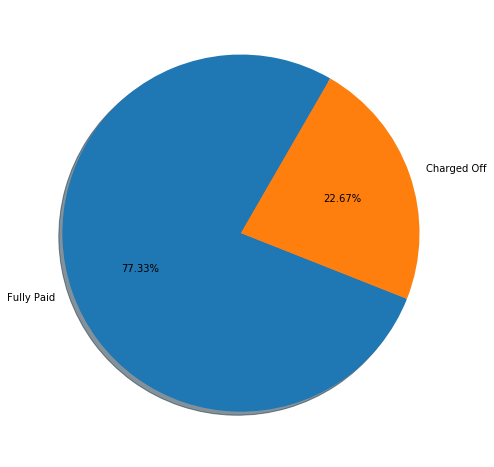

In [292]:
value=[curr_p,curr_c]

fig1, ax1 = plt.subplots(figsize=(8,10))

ax1.pie(value,labels=['Fully Paid','Charged Off'],autopct='%1.2f%%',
        shadow=True, startangle=60)

plt.show()
#curr_t

# 9.Conclusion
<a id="9"></a>

We applied Decision Tree Algorithm to predict the probability that a requested loan on LendingClub will charge off. After training and evaluating the model we found that, the model while far from perfect, can provide a somewhat informed prediction of the likelihood that a loan will charge off, using only data available to potential investors before the loan is fully funded.